<a href="https://colab.research.google.com/github/ertgrulyksk/Deep-Learning-Projects-With-Keras-TensorFlow-PyTorch/blob/main/Image_Classification_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [4]:
CLASSES = ['ucak', 'otomobil', 'kus', 'kedi', 'geyik', 'kopek', 'kurbaga', 'at', 'gemi', 'kamyon']

In [5]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


kurbaga


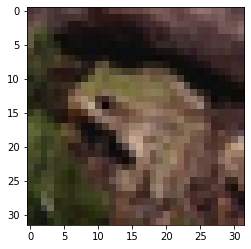

In [6]:
index=1453
plt.imshow(x_train[index],vmin=32,vmax=32)
print(CLASSES[int(y_train[index])])

at


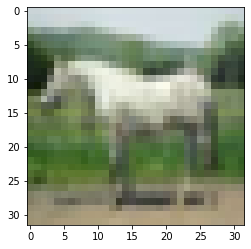

In [7]:
index = 2340
plt.imshow(x_test[index])
print(CLASSES[int(y_test[index])])

In [8]:
print(x_train.dtype)

uint8


In [9]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [10]:
x_train /= 255
x_test /= 255

In [11]:
print(y_train.dtype)

uint8


In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
print(y_train.dtype)

float32


In [14]:
first_model=Sequential()
first_model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32, 32, 3)))
first_model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
first_model.add(MaxPooling2D(pool_size=(2, 2)))
first_model.add(Flatten())
first_model.add(Dense(64, activation='relu'))
first_model.add(Dense(10, activation='softmax'))

In [15]:
first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

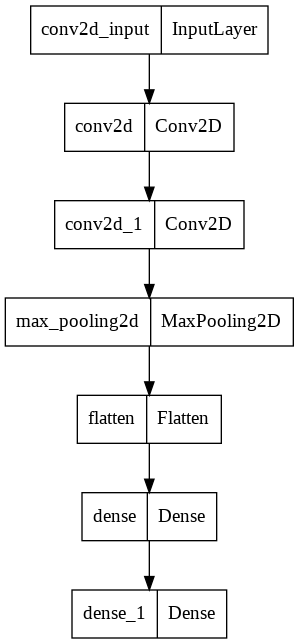

In [16]:
from keras.utils import plot_model
plot_model(first_model)

In [17]:
first_model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001), #SGD()
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
history = first_model.fit(x_train, y_train,
          batch_size=256,
          epochs=20,
          verbose=1,
          validation_split=0.2)

Epoch 1/20
157/157 [==============================] - 12s 19ms/step - loss: 1.8116 - accuracy: 0.3485 - val_loss: 1.4885 - val_accuracy: 0.4765
Epoch 2/20
157/157 [==============================] - 2s 15ms/step - loss: 1.3673 - accuracy: 0.5165 - val_loss: 1.2976 - val_accuracy: 0.5441
Epoch 3/20
157/157 [==============================] - 2s 15ms/step - loss: 1.2146 - accuracy: 0.5734 - val_loss: 1.2419 - val_accuracy: 0.5682
Epoch 4/20
157/157 [==============================] - 3s 18ms/step - loss: 1.1141 - accuracy: 0.6134 - val_loss: 1.1349 - val_accuracy: 0.6072
Epoch 5/20
157/157 [==============================] - 3s 16ms/step - loss: 1.0401 - accuracy: 0.6390 - val_loss: 1.1513 - val_accuracy: 0.6038
Epoch 6/20
157/157 [==============================] - 2s 16ms/step - loss: 0.9779 - accuracy: 0.6628 - val_loss: 1.0731 - val_accuracy: 0.6323
Epoch 7/20
157/157 [==============================] - 2s 16ms/step - loss: 0.9259 - accuracy: 0.6793 - val_loss: 1.0434 - val_accuracy: 0.643

In [19]:
score = first_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 5ms/step - loss: 1.1090 - accuracy: 0.6479
Test loss: 1.1089603900909424
Test accuracy: 0.6478999853134155


In [20]:
first_model.save('my_first_cifar10_model.h5')

In [21]:
!wget -O test_cifar_gemi.jpg https://khosann.com/wp-content/uploads/2017/12/yük_gemisi-elektrikli-elektrikli_gemi-çin-guangzhou.jpg
!wget -O test_cifar_ucak.jpg https://www.airlineratings.com/wp-content/uploads/uploads/B797.jpg

--2022-11-09 20:59:53--  https://khosann.com/wp-content/uploads/2017/12/y%C3%BCk_gemisi-elektrikli-elektrikli_gemi-%C3%A7in-guangzhou.jpg
Resolving khosann.com (khosann.com)... 104.21.26.245, 172.67.139.172, 2606:4700:3036::ac43:8bac, ...
Connecting to khosann.com (khosann.com)|104.21.26.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19576 (19K) [image/jpeg]
Saving to: ‘test_cifar_gemi.jpg’

test_cifar_gemi.jpg 100%[===================>]  19.12K  --.-KB/s    in 0.001s  

2022-11-09 20:59:53 (37.3 MB/s) - ‘test_cifar_gemi.jpg’ saved [19576/19576]

--2022-11-09 20:59:53--  https://www.airlineratings.com/wp-content/uploads/uploads/B797.jpg
Resolving www.airlineratings.com (www.airlineratings.com)... 104.25.127.27, 172.67.64.60, 104.25.126.27, ...
Connecting to www.airlineratings.com (www.airlineratings.com)|104.25.127.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80480 (79K) [image/jpeg]
Saving to: ‘test_cifar_ucak.jpg’

test_c

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [23]:
first_model = load_model('my_first_cifar10_model.h5')

In [24]:
image = load_img("test_cifar_ucak.jpg", target_size=(32, 32))
image = img_to_array(image) / 255 
image = np.expand_dims(image, axis=0)
print('shape:', image.shape)

shape: (1, 32, 32, 3)


In [25]:
preds = first_model.predict(image)

1/1 [==============================] - 0s 140ms/step


In [26]:
preds

array([[9.97221828e-01, 5.55824818e-06, 5.77854866e-04, 6.24572613e-06,
        3.77531273e-06, 1.09343496e-07, 2.31019512e-05, 2.99670049e-08,
        2.16156035e-03, 1.66125709e-08]], dtype=float32)

In [27]:
CLASSES[preds.argmax()]

'ucak'

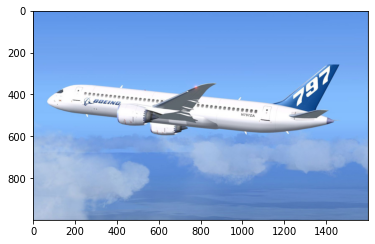

In [29]:
plt.imshow(plt.imread("test_cifar_ucak.jpg"))

In [30]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


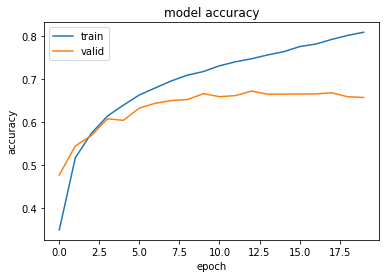

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

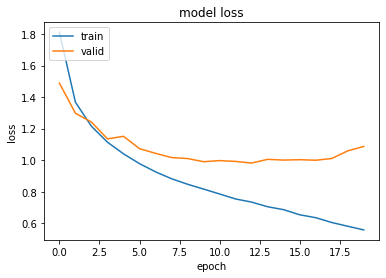

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()